In [3]:
import pandas as pd
df = pd.read_csv("C:\\Users\\tiwar\\OneDrive\\Documents\\CartSaver_ImpulsePurchaseData.csv")

df.head()


,Customer_ID,Age,Gender,Product,Category,Price,Is_Impulse,Time,Date,Discount_Applied
0,aeec9a3b-5b27-48e5-ab07-86dbdab62b3d,39,Other,Toothpaste,Personal Care,42.14,1,22:53:48,2025-06-15,20
1,9cd6931c-677b-4119-9742-cd86a846f171,56,Male,Juice,Beverages,93.54,1,21:18:58,2025-06-16,0
2,cc789bd4-7832-471b-a1e1-eb028cc65542,48,Other,Toothpaste,Personal Care,120.51,0,15:08:44,2025-06-15,15
3,1d7a6b0e-eee4-4713-90a4-3fa5582f9ec2,31,Other,Tissue Paper,Household,224.37,0,00:36:08,2025-06-08,10
4,4817aafa-5740-4ac2-9a4d-5cf9e205b47d,60,Female,Yogurt,Dairy,131.50,1,10:53:11,2025-06-14,20


In [5]:
# Shape of the dataset
df.shape

# Column names and types
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       1000 non-null   object 
 1   Age               1000 non-null   int64  
 2   Gender            1000 non-null   object 
 3   Product           1000 non-null   object 
 4   Category          1000 non-null   object 
 5   Price             1000 non-null   float64
 6   Is_Impulse        1000 non-null   int64  
 7   Time              1000 non-null   object 
 8   Date              1000 non-null   object 
 9   Discount_Applied  1000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


,Age,Price,Is_Impulse,Discount_Applied
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,38.358000,157.695410,0.290000,9.83000
std,12.568206,80.384465,0.453989,7.15348
min,18.000000,20.390000,0.000000,0.00000
25%,28.000000,85.785000,0.000000,5.00000
50%,38.000000,160.200000,0.000000,10.00000
75%,49.000000,226.712500,1.000000,15.00000
max,60.000000,299.880000,1.000000,20.00000


In [7]:
# Check missing values
df.isnull().sum()

# Check duplicates
df.duplicated().sum()


0

In [9]:
df.duplicated().sum()


0

In [11]:
print(df['Gender'].value_counts())
print(df['Product'].value_counts().head(10))  # Top 10
print(df['Category'].value_counts())


Gender
Other     343
Female    341
Male      316
Name: count, dtype: int64
Product
Frozen Fries    57
Milk            53
Bread           53
Ice Cream       52
Toothpaste      52
Cleaner         50
Cheese          50
Croissant       49
Frozen Pizza    48
Detergent       47
Name: count, dtype: int64
Category
Frozen Food      157
Dairy            147
Household        144
Snacks           144
Beverages        140
Bakery           139
Personal Care    129
Name: count, dtype: int64


In [15]:
print("Gender Distribution:\n", df['Gender'].value_counts())
print("\nTop 10 Products:\n", df['Product'].value_counts().head(10))
print("\nCategory Distribution:\n", df['Category'].value_counts())


Gender Distribution:
 Gender
Other     343
Female    341
Male      316
Name: count, dtype: int64

Top 10 Products:
 Product
Frozen Fries    57
Milk            53
Bread           53
Ice Cream       52
Toothpaste      52
Cleaner         50
Cheese          50
Croissant       49
Frozen Pizza    48
Detergent       47
Name: count, dtype: int64

Category Distribution:
 Category
Frozen Food      157
Dairy            147
Household        144
Snacks           144
Beverages        140
Bakery           139
Personal Care    129
Name: count, dtype: int64


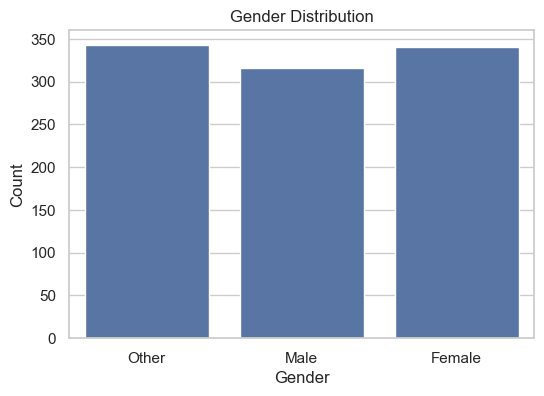

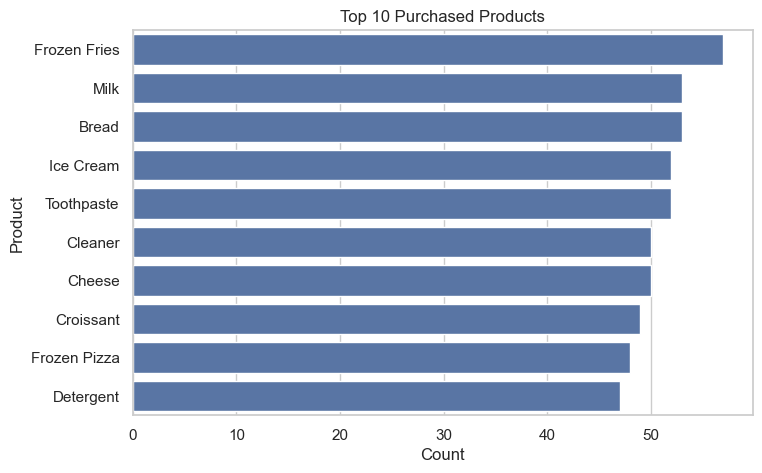

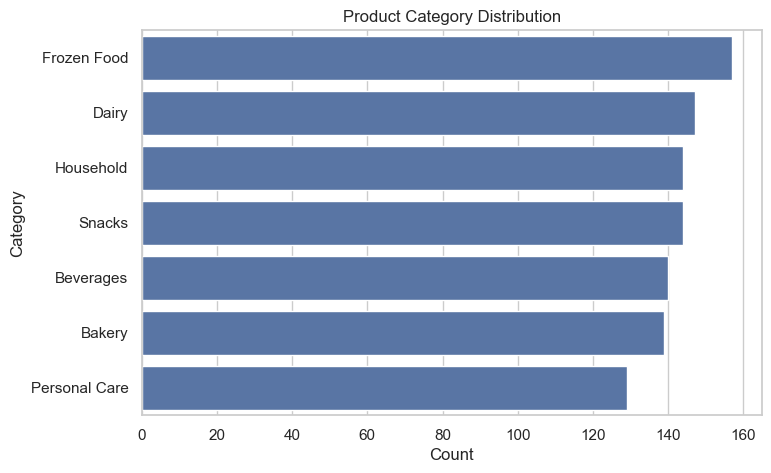

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot 1: Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Plot 2: Top 10 Products
plt.figure(figsize=(8,5))
top_products = df['Product'].value_counts().head(10).index
sns.countplot(data=df, y='Product', order=top_products)
plt.title("Top 10 Purchased Products")
plt.xlabel("Count")
plt.ylabel("Product")
plt.show()

# Plot 3: Product Category Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title("Product Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


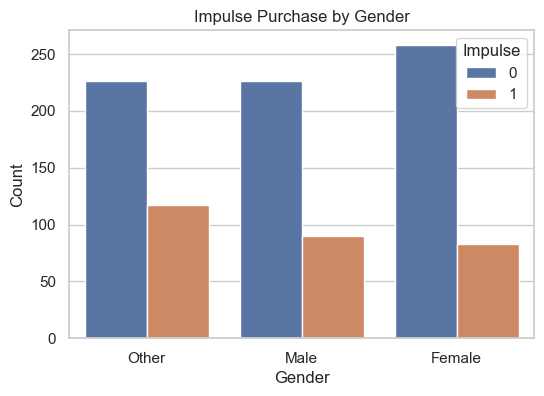

In [21]:
#Impulse Purchase by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Is_Impulse')
plt.title("Impulse Purchase by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Impulse')
plt.show()


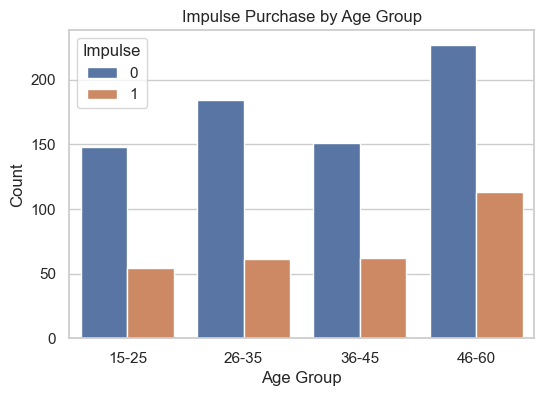

In [23]:
#Impulse Purchase by Age Group
# Create age bins
bins = [15, 25, 35, 45, 60]
labels = ['15-25', '26-35', '36-45', '46-60']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Age_Group', hue='Is_Impulse')
plt.title("Impulse Purchase by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Impulse')
plt.show()


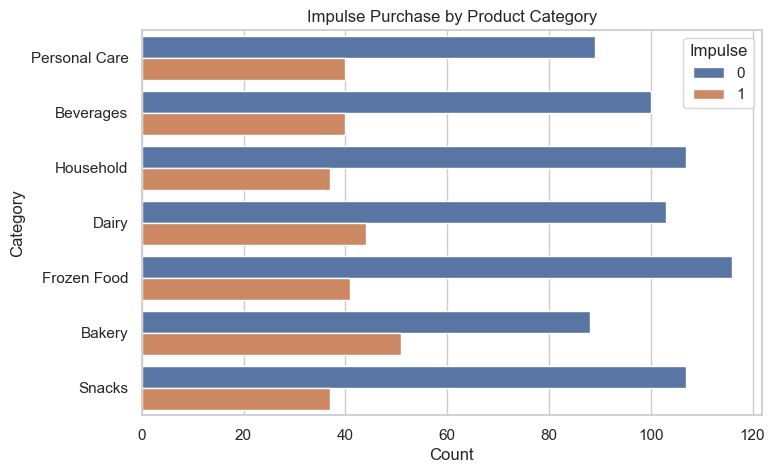

In [25]:
#Impulse Purchase by Product Category
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Category', hue='Is_Impulse')
plt.title("Impulse Purchase by Product Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.legend(title='Impulse')
plt.show()


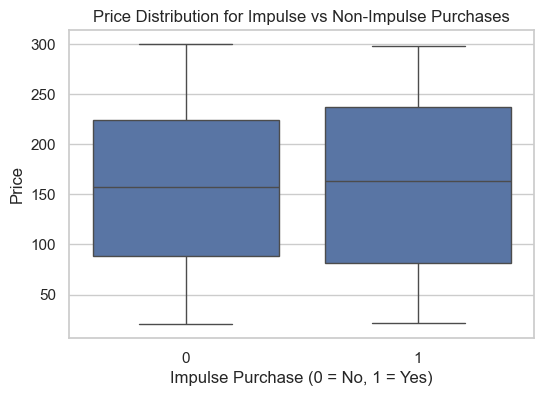

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Is_Impulse', y='Price')
plt.title("Price Distribution for Impulse vs Non-Impulse Purchases")
plt.xlabel("Impulse Purchase (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()


In [31]:
# Convert Time and Date to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Date'] = pd.to_datetime(df['Date'])

# Extract hour and weekday
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').apply(lambda x: x.hour)
df['Weekday'] = df['Date'].dt.day_name()


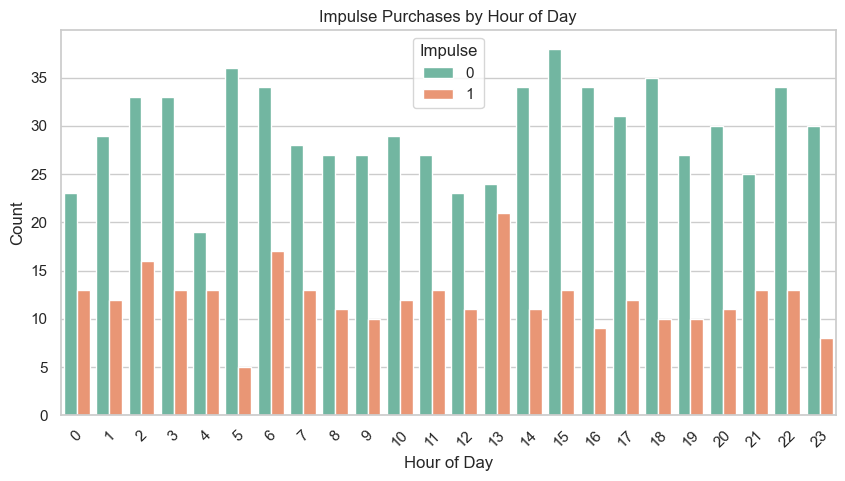

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Hour', hue='Is_Impulse', palette='Set2')
plt.title("Impulse Purchases by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title='Impulse')
plt.xticks(rotation=45)
plt.show()


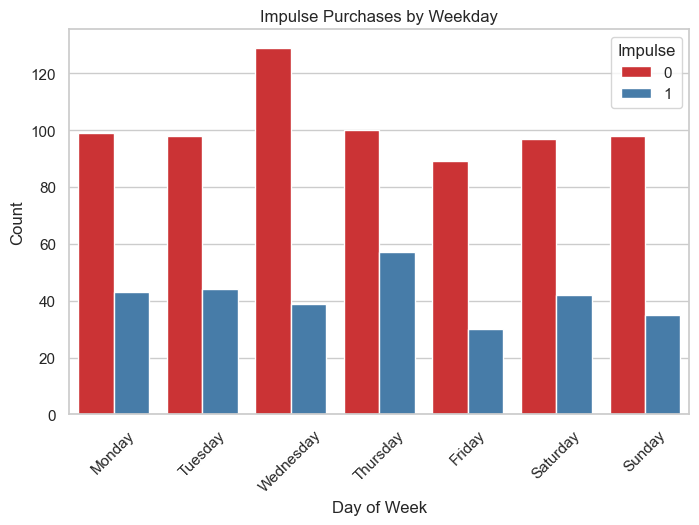

In [35]:
# Order the days for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Weekday', hue='Is_Impulse', order=days_order, palette='Set1')
plt.title("Impulse Purchases by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.legend(title='Impulse')
plt.xticks(rotation=45)
plt.show()


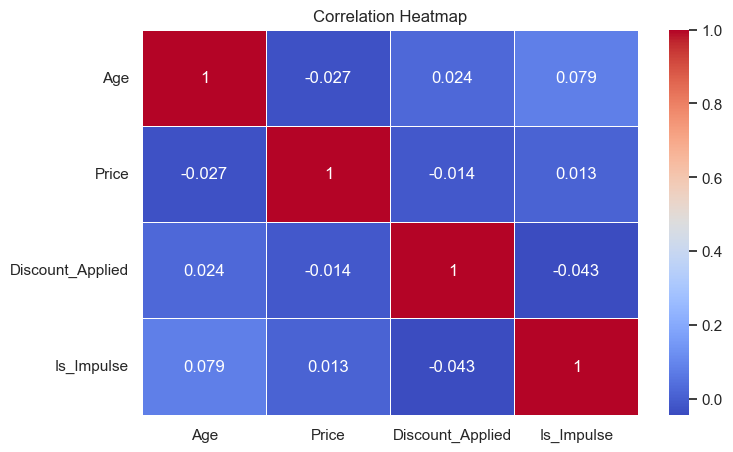

In [37]:
# Select only numerical columns for correlation
numeric_df = df[['Age', 'Price', 'Discount_Applied', 'Is_Impulse']]

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


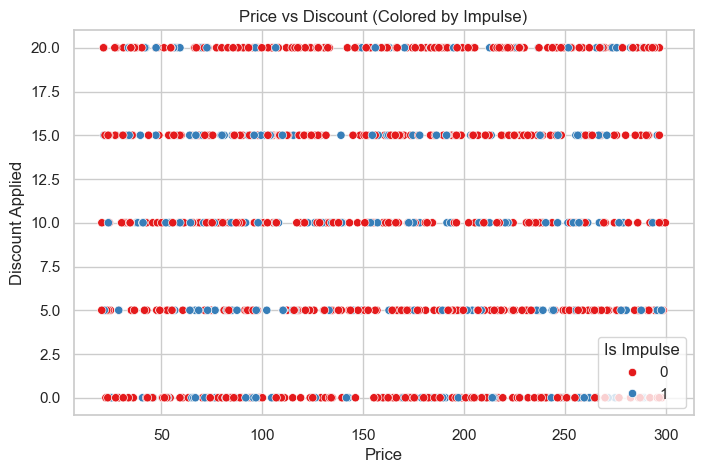

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price', y='Discount_Applied', hue='Is_Impulse', palette='Set1')
plt.title("Price vs Discount (Colored by Impulse)")
plt.xlabel("Price")
plt.ylabel("Discount Applied")
plt.legend(title="Is Impulse")
plt.show()


In [41]:
df.to_csv("C:/Users/tiwar/Downloads/CartSaver_Cleaned.csv", index=False)
